In [1]:
import sys
sys.path.insert(1, '/home/amrzr/Work/Codes/Offline_IMOEA_Framework/')
from desdeo_problem.testproblems.TestProblems import test_problem_builder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

In [26]:
nobjs = 2
nvars = 3
N = 450
px=0.5

In [27]:
dtlz2 = test_problem_builder("DTLZ2", n_of_objectives= nobjs, n_of_variables=nvars)
sampler = qmc.LatinHypercube(d=nvars)
dtlz_data = sampler.random(n=N)
#dtlz_data = np.random.random((N,nvars))
dtlz_obj_val = dtlz2.evaluate(dtlz_data)

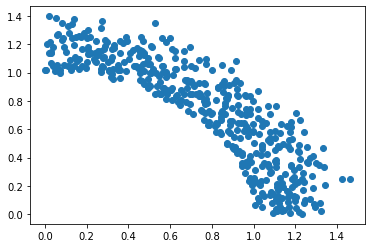

In [28]:
plt.scatter(dtlz_obj_val[0][:,0], dtlz_obj_val[0][:,1])
plt.show()

In [29]:
bound1 = np.ones(nvars)*0.2
bound1 = np.tile(bound1,(N,1))
bound2 = np.ones(nvars)*0.65
bound2 = np.tile(bound2,(N,1))
failed_loc = np.where(np.all(dtlz_data >= bound1, axis=1) & np.all(dtlz_data <= bound2, axis=1))
stat_success = np.ones((N,1))
stat_success[failed_loc,0]=0

In [30]:
obj_vals = dtlz_obj_val[0]
obj_success = obj_vals[np.where(stat_success==1)[0],:]
obj_failed = obj_vals[np.where(stat_success==0)[0],:]

In [31]:
np.size(failed_loc)

48

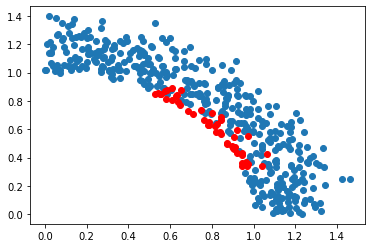

In [32]:
plt.scatter(obj_success[:,0], obj_success[:,1])
plt.scatter(obj_failed[:,0], obj_failed[:,1], c='r')
plt.show()

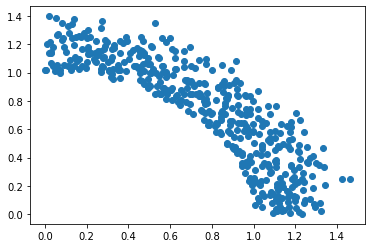

In [33]:
plt.scatter(dtlz_obj_val[0][:,0], dtlz_obj_val[0][:,1])
plt.show()

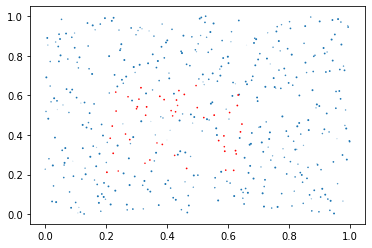

In [35]:
data_success = dtlz_data[np.where(stat_success==1)[0],:]
data_failed = dtlz_data[np.where(stat_success==0)[0],:]
plt.scatter(data_success[:,0], data_success[:,1], data_success[:,2])
plt.scatter(data_failed[:,0], data_failed[:,1], data_failed[:,2], c='r')
plt.show()